## Deep Learning Applied to Images - Introduction to Deep Learning

#### Prof. Thomas da Silva Paula

### Fully-connected neural network for image classification

* Using Keras
* Using Fashion Mnist

## Imports

In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

## Loading the dataset

In [3]:
classes = ['t-shirt/top', 'trouser', 'pullover', 
           'dress', 'coat', 'sandal', 'shirt',
           'sneaker', 'bag', 'ankle boot']
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

### Exploring the dataset

In [4]:
print('[Train]', 'Images:', X_train.shape, X_train.dtype, '- Labels:', y_train.shape, y_train.dtype)
print('[Test]', 'Images:', X_test.shape, X_test.dtype, '- Labels:', y_test.shape, y_test.dtype)

[Train] Images: (60000, 28, 28) uint8 - Labels: (60000,) uint8
[Test] Images: (10000, 28, 28) uint8 - Labels: (10000,) uint8


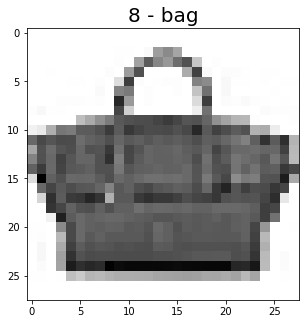

In [9]:
index = 233

class_id = y_train[index]
class_name = classes[class_id]
img = X_train[index]


plt.title(str(class_id) + ' - ' + class_name, fontsize=20)
plt.imshow(img, cmap='binary')

### Preprocessing

In [10]:
print('Train:', X_train.mean(), X_train.max(), X_train.min())
print('Test:', X_test.mean(), X_test.max(), X_test.min())

Train: 72.94035223214286 255 0
Test: 73.14656658163265 255 0


### Images are now between 0 and 1

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
print('Train:', X_train.mean(), X_train.max(), X_train.min())
print('Test:', X_test.mean(), X_test.max(), X_test.min())

Train: 0.2860405969887955 1.0 0.0
Test: 0.2868492807122849 1.0 0.0


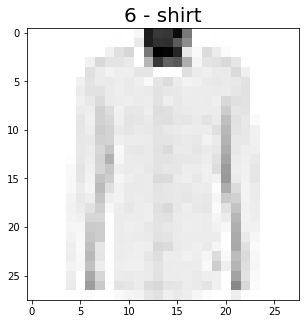

In [13]:
index = 33

class_id = y_train[index]
class_name = classes[class_id]
img = X_train[index]


plt.title(str(class_id) + ' - ' + class_name, fontsize=20)
plt.imshow(img, cmap=plt.cm.binary)

## Building our model

### Sequential API

In [14]:
X_train.shape[1:]

(28, 28)

In [15]:
input_shape = X_train.shape[1:]

model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, y_train,
                 batch_size=32,
                 epochs=10,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6341 - accuracy: 0.7736 - val_loss: 0.5022 - val_accuracy: 0.8153
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4955 - accuracy: 0.8249 - val_loss: 0.4456 - val_accuracy: 0.8444
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4705 - accuracy: 0.8373 - val_loss: 0.4251 - val_accuracy: 0.8517
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4648 - accuracy: 0.8413 - val_loss: 0.4216 - val_accuracy: 0.8555
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4579 - accuracy: 0.8482 - val_loss: 0.4383 - val_accuracy: 0.8459
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4531 - accuracy: 0.8478 - val_loss: 0.4224 - val_accuracy: 0.8653
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4533 - accuracy: 0.8497 - val_loss: 0.4790 - val_accuracy:

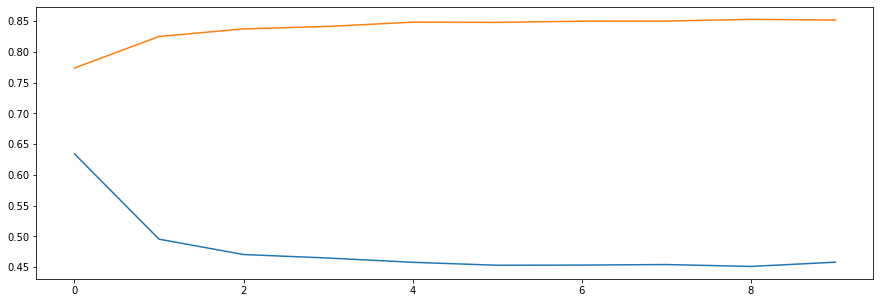

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

### Functional API

In [28]:
inputs = keras.layers.Input(shape=input_shape)
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation=tf.nn.relu)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(64, activation=tf.nn.relu)(x)
predictions = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

In [29]:
model_func = keras.models.Model(inputs=inputs, outputs=predictions)
model_func.compile(optimizer='rmsprop',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])  

In [30]:
model_func.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

In [31]:
hist_func = model_func.fit(X_train, y_train,
                           batch_size=32,
                           epochs=10,
                           validation_data=(X_test, y_test),
                           verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6301 - accuracy: 0.7767 - val_loss: 0.5134 - val_accuracy: 0.8125
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4983 - accuracy: 0.8252 - val_loss: 0.4411 - val_accuracy: 0.8406
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4742 - accuracy: 0.8353 - val_loss: 0.4225 - val_accuracy: 0.8538
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4636 - accuracy: 0.8417 - val_loss: 0.4154 - val_accuracy: 0.8602
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4610 - accuracy: 0.8468 - val_loss: 0.4249 - val_accuracy: 0.8552
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4575 - accuracy: 0.8478 - val_loss: 0.4307 - val_accuracy: 0.8604
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4571 - accuracy: 0.8503 - val_loss: 0.4522 - val_accuracy:

## Evaluating our model

In [34]:
y_test_pred = model.predict(X_test)

In [44]:
X_test.shape

(10000, 28, 28)

In [38]:
y_test_pred[0]

array([1.43654219e-07, 3.33055252e-13, 1.28030395e-08, 2.47081431e-07,
       2.55485043e-06, 1.25333127e-02, 4.24025359e-07, 9.66680199e-02,
       4.36033588e-06, 8.90790880e-01], dtype=float32)

In [39]:
y_test_pred = np.argmax(y_test_pred, axis=1)

In [40]:
y_test_pred[0]

9

In [41]:
print(y_test_pred)

[9 2 1 ... 8 1 5]


In [42]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.72      0.82      0.76      1000
           3       0.78      0.93      0.85      1000
           4       0.74      0.79      0.76      1000
           5       0.96      0.95      0.95      1000
           6       0.76      0.52      0.62      1000
           7       0.90      0.96      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



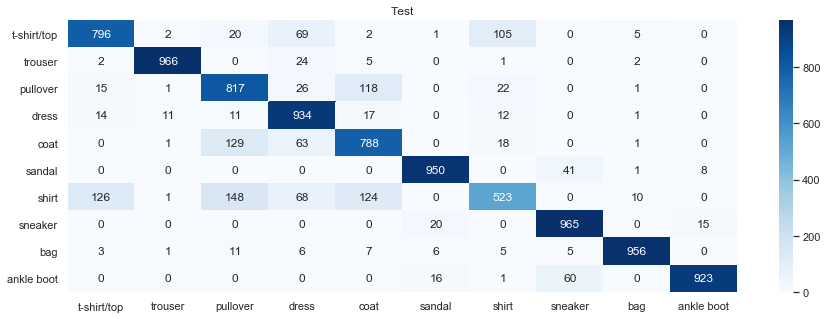

In [43]:
cm = confusion_matrix(y_test, y_test_pred)
sns.set()
plt.figure()
plt.title('Test')
sns.heatmap(cm, annot=True, yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='d')

## Testing our model

In [45]:
test_index = 99
test_img = X_test[test_index]
test_label = classes[y_test[test_index]]

In [48]:
test_img.shape

(28, 28)

In [49]:
np.expand_dims(test_img, axis=0).shape

(1, 28, 28)

In [50]:
preds = model.predict(np.expand_dims(test_img, axis=0))
print(preds)

[[1.8704394e-04 8.2646179e-10 9.5537817e-01 2.7518599e-06 1.6872877e-02
  1.4275206e-14 2.7557472e-02 1.2448951e-20 1.7608443e-06 3.0146684e-18]]


pullover


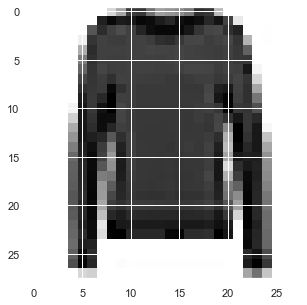

In [51]:
print(test_label)
plt.imshow(test_img, cmap='binary')

<BarContainer object of 10 artists>

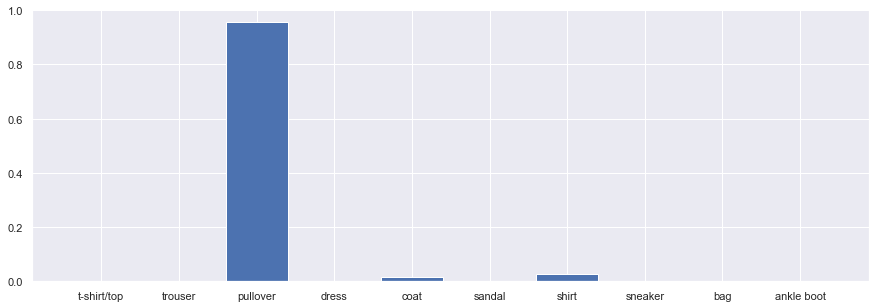

In [52]:
plt.bar(np.arange(0, len(preds[0])), preds[0], tick_label=classes)

## Testing our model with custom images

In [53]:
keras_img = keras.preprocessing.image

### Loading in the exact way the model expects
We need to make sure the size of the image, number of channels, and data format are all correct. We also need to do any preprocessing step that was made, such as dividing by 255.

In our case, we need to:
* Resize image to 28x28
* Convert it to grayscale
* Load it as uint8
* Normalize the pixels to be between 0 and 1

In [71]:
img = keras_img.load_img('sample_images/tshirt.png',
                         color_mode='grayscale',
                         target_size=(28, 28))

img = keras_img.img_to_array(img,
                             dtype='uint8')

print(img.shape, img.dtype)

(28, 28, 1) uint8


In [72]:
img = img / 255
print(img.max(), img.min())

0.9411764705882353 0.0


### We still need to remove that extra dimension and add the image in a batch of 1
The model expects the shape (batch, width, height), so we need to preprocess our image accordingly.

In [73]:
print(img.shape)

(28, 28, 1)


In [74]:
img = img.reshape(28, 28)
print(img.shape)

(28, 28)


In [75]:
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 28, 28)


### Do the prediction

In [76]:
preds = model.predict(img)
print(preds)

[[3.4124219e-01 3.5825691e-03 1.1473179e-01 1.3775274e-01 5.9356686e-02
  1.5159353e-08 3.2607666e-01 2.7211264e-10 1.7257322e-02 8.8477621e-11]]


We need to specify the index 0 since we are receiving a list of 1 image

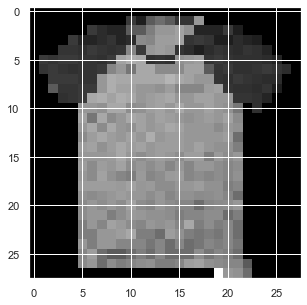

In [77]:
plt.imshow(img[0], cmap='gray')

<BarContainer object of 10 artists>

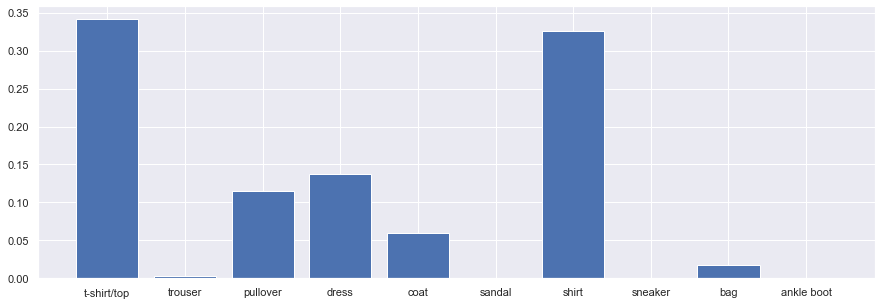

In [78]:
plt.bar(np.arange(0, len(preds[0])), preds[0], tick_label=classes)